<h2>Scope Rules</h2>

Suppose there are multiple functions with the same name and multiple variables with the same name. How does Python decide which function and variable to use when?

It uses the ***Scope Rules***. There are multiple layers and python searches for objects layers by layer, moving from the inner layers towards the outer layers.

**Scope Rule Memorisation**: ***LEGB***.

* **L**: Local
* **E**: Enclosing Function
* **G**: Global
* **B**: Built-In

Local is the current function you're in. Enclosing function is the function which calls the current function. Global is the module in which the function was defined. Bulti-In is Python's built in namespace.

***When Python can not resolve a name, a name error exception is generated and the program execution stops at this moment.***

In [3]:
# Example
# Update Function
def update():
    x.append(1)

In [4]:
# Executing the function
update()
# When this function is run, a name error is shown saying the name x is not defined.

NameError: name 'x' is not defined

In [5]:
# Defining the variable x globally (outside the update function)
x = [2,3,4]
update()

In [6]:
x

[2, 3, 4, 1]

In [ ]:
# Procedure taken by Python
# Using LEGB rule, it looks in the inner most layer (Local update function) but it can't find x there.
# Then it moves on to the next higher layer, which is an enclosing function, but there is no enclosing function since we do not
# call the update function from within another function.
# Then it moves on to the next layer which is the global layer where x has been defined as a list object. Since x is the first 
# object with the name `x`, it will use that in the function.

In [7]:
# Example
def update(n,x):
    n = 2
    x.append(4)
    print('update:',n,x)

def main():
    n = 1
    x = [0,1,2,3]
    print('main:',n,x)
    update(n,x)
    print('main:',n,x)

main()

# Flow of code and what exactly is happening here
# n defined as a integer number (immutable)
# x defined as a list (mutable)
# Line 9: n and x are printed as 1 and [0,1,2,3] respectively
# Line 10: inside the function update, n is redefined again but x is just modified
# Due to the LEGB scope rules, Python recognises n as 2 (instead of 1) since 
# it has been defined as 2 inside the local update function (inner most layer)
# while for x, it looks at the next highest layer whoch is the enclosing main
# function. 

# Line 10: The print output of update thus prints n as 2 and x as [0,1,2,3,4]
# Line 11: Now when n and x are printed, x is the modified list (mutable object)
# while n is still 1 as now the lowest layer is the main function.

main: 1 [0, 1, 2, 3]
update: 2 [0, 1, 2, 3, 4]
main: 1 [0, 1, 2, 3, 4]


In [ ]:
# Example
def increment(n):
    n = n+1
    print(n)
    
n = 1
increment(n)
print(n)

# Expected Output: 2;1
# Since numbers are immutable (thus n doesn't change when n = n+1 inside the increment function)

In [10]:
# Example
def incr(n):
    n = n+1
    return n # The reassigned variable name referring to the increased number is returned

n = 1
while n<10:
    n = incr(n) # Since this function returns the reassigned name to the increased nuber, n also becomes reassigned to the 
                # increased number
print(n)

10


<h2>Classes and Object Oriented Programming</h2>

Main emphasis on: *Functional Programming*.

We can create new objects via **classes**. The object will be the instance of that particular class. Class is basically the blueprint for that object.

**Inheritance**: we can inherit properties (functions/methods and fields) of other existing classes/objects. The baseclass (superclass) and the derived class (subclass). The derived class can be seen as a more specialised version of its base class, i.e. it will have all the properties of its base class but also its add on properties.

Defining a class just provides the blueprint for the new object but its is not the object itself or the execution of it. It is analogous to defining a function. When we define a function, we are just giving a blueprint for how the function works instead of calling or executing the function.

In [12]:
# Reviewing already existing methods for the list object
x = [5,2,9,11,10,2,7]

min(x) # lowest element of the list
    

2

In [13]:
max(x) # highest element of the list

11

In [15]:
# Removing elements from a list
x.remove(2)
x
# if there are multiple elements of the same number being removed, only the first instance will be removed

[5, 9, 11, 10, 2, 7]

In [16]:
# Example:
class MyClass(list): # ClassName(Object/Class it is inheriting from)
    # Defnining the methods/functions associated with the object (Instance Methods)
    def remove_min(self): # Removes the lowest number of the list itself
        self.remove(min(self))
    def remove_max(self): # Removes the highest number of the list
        self.remove(max(self))
    # Self: Instance Variable of the class
    # For the above methods, the min,max and remove methods of list objects have been inherited

In [17]:
# Example
x = [2,4,3,6,5,7] # Standard List
y = MyClass(x) # y is the new object which is governed by MyClass class

In [18]:
# Available methods for object y
dir(y)
# It will have all the methods of a standard list object (since it has inherited from it) plus the two additional methods we 
# defined seperately

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'remove_max',
 'remove_min',
 'reverse',
 'sort']

In [19]:
y.remove_min()
y

[4, 3, 6, 5, 7]

In [20]:
y.remove_max()
y

[4, 3, 6, 5]

In [21]:
# Example
# New Object
class NewList(list):
    def remove_max(self):
        self.remove(max(self)) # Removes the highest number of the list
    def append_sum(self):
        self.append(sum(self)) # Appends the sum of the list elements to the list

In [22]:
x = NewList([1,2,3]) # x is of the object type NewList
while max(x) <10:
    x.remove_max()
    x.append_sum()
    
print(x)

# Process:
# x -> [1,2,3]
# max(x) = 3
# x -> [1,2]
# x -> [1,2,3]
# and the same continues
# this program will never halt

KeyboardInterrupt: 

<h2>NumPy and Arrays</h2>

NumPy arrays: n-dimensional arrays.

Reference: numpy.org

**NumPy Arrays**:
* Unlike standard Python lists, NumPy arrays are of a given size and length and it can't be changed once created
* They can only contain data of one data type only with floating point numbers being the standard data type


In [23]:
import numpy as np # Importing NumPy arrays
zero_vector = np.zeros(5) # a row vector of zeros is formed
zero_vector

array([0., 0., 0., 0., 0.])

In [24]:
zero_matrix = np.zeros((5,3)) # A tuple is used to denote the number of rows and columns in the matrix
zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# Empty Array (Similar to NaN array in MATLAB)
empt_array = np.empty(4)
empt_array
# Empty array allocates the requested space for the array, but does not initialise it
# Helpful in saving compjtational time when we know the array is going to get updated every iteration of a loop or something

array([4.24399158e-314, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [26]:
# Making arrays formed from list objects
list_array = np.array([1,2,3,4])
list_array

array([1, 2, 3, 4])

In [27]:
# Example
x = np.array([1,2,3])
y = np.array([2,3,6])
# 2D array
TwoDarray = np.array([[1,3],[5,9]]) # The rows are contained in sublists seperated by a comma, which in turn are nested into a 
                                    # bigger list. The comma between the sublists basically signifies the row change
TwoDarray

array([[1, 3],
       [5, 9]])

In [28]:
# Transopse of a 2D array
TwoDarrayT = TwoDarray.transpose()
TwoDarrayT

array([[1, 5],
       [3, 9]])

<h3>Slicing NumPy Arrays</h3>

First Index: Row of array

Second Index: Column of Array

Similar to standard slicing, the last index of the slicing range is not included.

In [30]:
# 2 1D arrays
x = np.array([1,2,3])
y = np.array([2,3,6])
# 2 2D arrays
X = np.array([[1,2,3],[4,5,6]])
Y = np.array([[2,3,6],[8,10,12]])

In [31]:
x[2]

3

In [32]:
x[0:2]

array([1, 2])

In [33]:
x

array([1, 2, 3])

In [34]:
z = x + y
z # Element wise additions of x and y

array([3, 5, 9])

In [35]:
X[:,1] # Second column of array X

array([2, 5])

In [36]:
X[:,1] + Y[:,1] # Adding the second columns of array X and Y

array([ 5, 15])

In [37]:
# VERY IMPORTANT
# List1 + List2 -> ?
[1,2] + [3,4]
# The + sign concatinates the two lists together instead of doing element wise addition

[1, 2, 3, 4]

In [38]:
# instead
np.array([1,2]) + np.array([3,4])

array([4, 6])

<h3>Indexing of Arrays</h3>

In [39]:
z1 = np.array([1,3,5,7,9])
z2 = z1 + 1 # 1 is added to every single element of z1
z2

array([ 2,  4,  6,  8, 10])

In [40]:
# List for indexing
ind = [0,2,3]
z1[ind] # 1st, 3rd and 4th elements of the array are returned

array([1, 5, 7])

In [42]:
# NumPy array for indexing
ind = np.array([0,2,3])
z1[ind]

array([1, 5, 7])

***NumPy Arrays can be indexed using boolean expressions too (True/False)***

In [43]:
# Boolean array
z1>6 # this compares every element of z1 to and based on the comparison fills in boolean expressions in the corresponding array
     # indices

array([False, False, False,  True,  True])

In [44]:
# Another example
z1[z1>6] # all those indices will be returned where the corresponding element is greater than 6

array([7, 9])

In [45]:
z2[z1>6]

array([ 8, 10])

In [47]:
ind = z1>6 # Constructing a logical vector [false,false,false,true,true]
ind

array([False, False, False,  True,  True])

In [48]:
z1[ind] # Only the elements corresponding to True will be returned

array([7, 9])

**Very Important**: *When we index arrays, we are just returning **copies** of the orgiginal array, so even if we modify the indexed array, the original array won't get modified. But slicing is a view into the original array. Thus, if we modify the sliced array, the original array will also get modified.*

In [49]:
a = np.array([1,2])
b = np.array([3,4,5])
c = b[1:] # from 2nd element till the end
b[a] is c # False since b[a] is an indexing of array b which means it is a copy of the original array and thus a different
          # object. c is a slicing of b thus a view into b array but still a different object from b[a]

False

In [50]:
b[a] == c # True since the content is the same

array([ True,  True])

<h1> Fast Fourier Transforms in Python </h1>

**Some important points:**
* It trasnforms the data from the time domain to the frequency domain
* Transforms the signal from `Amplitude vs Time` to `Frequency Strength vs Frequency`
* Fourier Transforms basically decompose a signal (which is a superposition of multiple pure signals) and detects the frequencies of the constituent pure signals
* If there are 10 pure signals in any arbritary signal, then FFT will produce 3 peaks (i.e. 3 frequencies of 3 pure signals are detected)
* The strength of each constituent frequency depends on the contribution of the corresponding pure signal
* The fourier trasnforms can be classified on the type of data they act upon, If we are working with discrete data (for example experimental data0, then we use DFT (discrete fourier Transforms). ***FFT (Fast Fourier Transforms) is an algorithm for computing the DFT, not a different classification of fourier transform itself***.
* The `scipy` module in Python can be used to apply FFTs
* `scipy.fft()` accepts complex values inputs and `scipy.rfft()` only accepts real values inputs
* Other transforms closely related to DFT: **Discrete Cosine Transforms (DCT)** and **Discrete Sine Transform (DST)**

Text(0.5, 1.0, 'Mixed Signal')

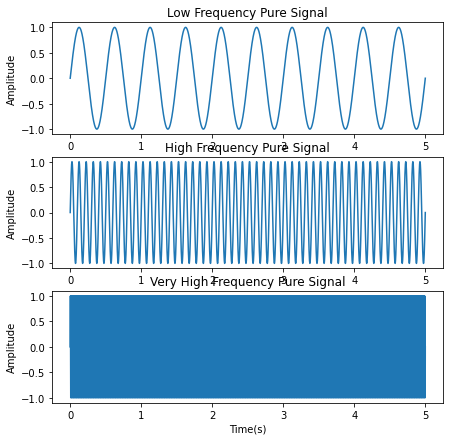

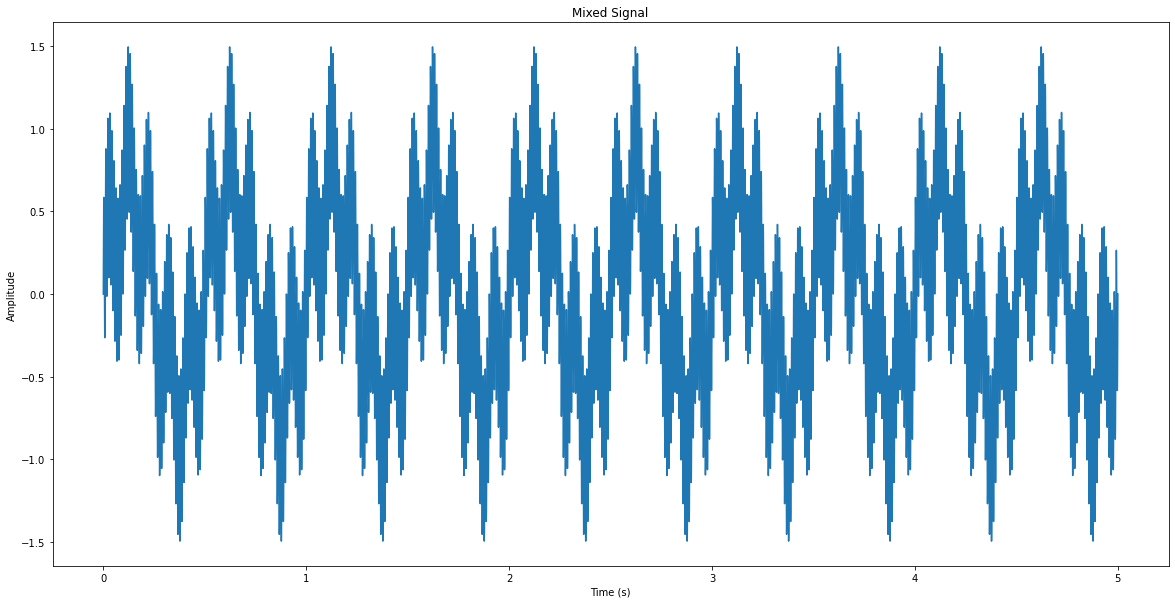

In [37]:
# Example: 
import numpy as np
import matplotlib.pyplot as plt
dur = 5 # Duration (s)
freq1 = 2
freq2 = 10
freq3 = 100

# Sampling Frequency of each Pure signal
sampFreq = 44100 #Hz

# Number of datapoints
dataNum = sampFreq*dur # #Datapoints = Sampling Frequency*Duration

time = np.linspace(0,dur,dataNum)
x1 = np.sin(2*np.pi*freq1*time) # Pure Signal 1
x2 = np.sin(2*np.pi*freq2*time) # Pure Signal 2
x3 = np.sin(2*np.pi*freq3*time) # Pure Signal 2

# Pure Signal Weights
w1 = 0.6 
w2 = 0.4
w3 = 0.5
# Mixed Signal
m = w1*x1 + w2*x2 + w3*x3
fig1 , (axis1,axis2,axis3) = plt.subplots(nrows = 3, ncols = 1, figsize = (7,7))
axis1.plot(time,x1)
axis2.plot(time,x2)
axis3.plot(time,x3)
axis1.set_xlabel('Time(s)')
axis2.set_xlabel('Time(s)')
axis3.set_xlabel('Time(s)')
axis1.set_title('Low Frequency Pure Signal')
axis1.set_ylabel('Amplitude')
axis2.set_ylabel('Amplitude')
axis2.set_title('High Frequency Pure Signal')
axis3.set_ylabel('Amplitude')
axis3.set_title('Very High Frequency Pure Signal')
fig2 = plt.figure(figsize = (20,10))
plt.plot(time,m)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Mixed Signal')

<h2> Some important things about the FFT functionality in Python:</h2>

* `fft()` computes the fourier trasnform itself (amplitude -> Frequency Strength). Basically, generating the Y-axis in the frequency domain
* `fftfreq()` computes the frequencies in the output of `fft()`. Basically, generating the X-axis in the frequency domain
* While using `fft()` and `fftfreq()` the frequency domain plots are reflected about the Y axis (since `fft()` takes in the complex inputs of the fourier transform). 
* We can use `rfft()` and `rfftfreq()` to generate only the plots in the rigt hand plane (since `rrft()` takes in the real inputs of the fourier transforms).

(0.0, 150.0, 0.0, 100.0)

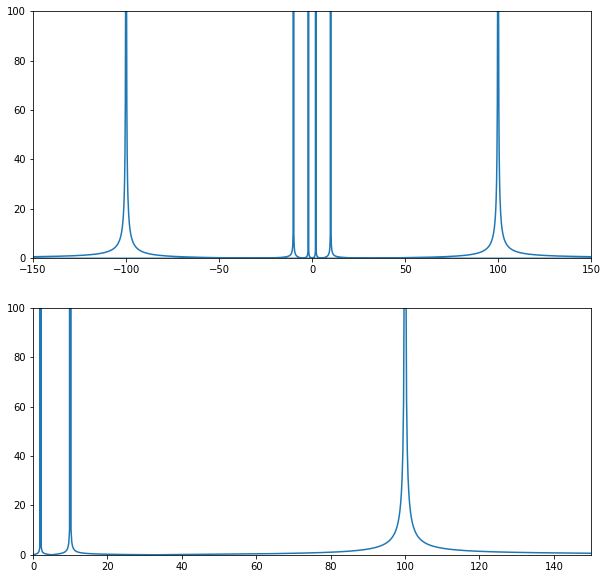

In [41]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq

yf = fft(m)
xf = fftfreq(dataNum,1/sampFreq)
yfr = rfft(m)
xfr = rfftfreq(dataNum,1/sampFreq)
fig, (axis1,axis2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
axis1.plot(xf,yf) # abs(yf) can be used too, but for this example, a very high frequency strength is achieved (not sure why)
# Generally for most experimental data abs(yf) is used otherwise there are negative frequency strength values too 
axis1.axis([-150,150,0,100])
axis2.plot(xfr,yfr)
axis2.axis([0,150,0,100])

In [47]:
max(abs(yfr))

66149.94311255285